In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [112]:
pwd

'C:\\Users\\91843'

In [114]:
data= pd.read_csv("Flight_Fare.csv")

In [116]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [118]:
print(data.tail())

           Airline Date_of_Journey    Source Destination  \
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time Arrival_Time Duration Total_Stops  \
10678              CCU ? BLR    19:55        22:25   2h 30m    non-stop   
10679              CCU ? BLR    20:45        23:20   2h 35m    non-stop   
10680              BLR ? DEL    08:20        11:20       3h    non-stop   
10681              BLR ? DEL    11:30        14:10   2h 40m    non-stop   
10682  DEL ? GOI ? BOM ? COK    10:55        19:15   8h 20m     2 stops   

      Additional_Info  Price  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [122]:
print(data.describe())

              Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


In [124]:
print(data.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [126]:
data = data.dropna()

In [128]:
print(data.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [130]:
# Verify column names
print("Column names:", data.columns)

# Ensure there are no leading/trailing spaces in column names
data.columns = data.columns.str.strip()

# Check for null values and replace if necessary
data['Date_of_Journey'] = data['Date_of_Journey'].fillna('01/01/2020')

# Convert 'Date_of_Journey' to day and month
data['Journey_Day'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y').dt.day
data['Journey_Month'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y').dt.month

# Drop original 'Date_of_Journey' column
data = data.drop(['Date_of_Journey'], axis=1)

# Check results
print(data.head())


Column names: Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')
       Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR ? DEL    22:20   
1    Air India   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL ? LKO ? BOM ? COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU ? NAG ? BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR ? NAG ? DEL    16:50   

   Arrival_Time Duration Total_Stops Additional_Info  Price  Journey_Day  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897           24   
1         13:15   7h 25m     2 stops         No info   7662            1   
2  04:25 10 Jun      19h     2 stops         No info  13882            9   
3         23:30   5h 25m      1 stop         No info   621

In [132]:
# Ensure 'Arrival_Time' is in proper datetime format
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'], errors='coerce', format='%H:%M')  # 24-hour format
# Drop rows where 'Arrival_Time' is invalid (NaT)
data = data.dropna(subset=['Arrival_Time'])

# Extract hour and minute from 'Arrival_Time'
data['Arrival_Hour'] = data['Arrival_Time'].dt.hour
data['Arrival_Minute'] = data['Arrival_Time'].dt.minute
# Drop the original 'Arrival_Time' column
data = data.drop(['Arrival_Time'], axis=1)

# Convert 'Duration' to minutes
def duration_to_minutes(duration):
    hours, minutes = 0, 0
    # Extract hours and minutes from 'Duration'
    if 'h' in duration:
        hours = int(duration.split('h')[0])
        if 'm' in duration:  # Handle cases like '2h 30m'
            minutes = int(duration.split('h')[1].replace('m', '').strip())
    elif 'm' in duration:  # Handle cases like '30m'
        minutes = int(duration.replace('m', '').strip())
    return hours * 60 + minutes

data['Duration_Minutes'] = data['Duration'].apply(duration_to_minutes)
# Drop the original 'Duration' column
data = data.drop(['Duration'], axis=1)

# Check the result
print(data.head())


             Airline    Source Destination                  Route Dep_Time  \
1          Air India   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR    05:50   
3             IndiGo   Kolkata    Banglore        CCU ? NAG ? BLR    18:05   
4             IndiGo  Banglore   New Delhi        BLR ? NAG ? DEL    16:50   
5           SpiceJet   Kolkata    Banglore              CCU ? BLR    09:00   
9  Multiple carriers     Delhi      Cochin        DEL ? BOM ? COK    11:25   

  Total_Stops Additional_Info  Price  Journey_Day  Journey_Month  \
1     2 stops         No info   7662            1              5   
3      1 stop         No info   6218           12              5   
4      1 stop         No info  13302            1              3   
5    non-stop         No info   3873           24              6   
9      1 stop         No info   8625           27              5   

   Arrival_Hour  Arrival_Minute  Duration_Minutes  
1            13              15               445  
3            23   

In [134]:
# Ensure 'Total_Stops' column is correctly formatted (remove extra spaces)
data['Total_Stops'] = data['Total_Stops'].str.strip()

# Map 'Total_Stops' to integers
data['Total_Stops'] = data['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

# Explicitly cast 'Total_Stops' to integer to avoid future deprecation warning
data['Total_Stops'] = data['Total_Stops'].astype(int)

# Handle missing values in categorical columns
data['Airline'] = data['Airline'].fillna('Unknown')
data['Source'] = data['Source'].fillna('Unknown')
data['Destination'] = data['Destination'].fillna('Unknown')

# One-Hot Encoding for categorical columns
data = pd.get_dummies(data, columns=['Airline', 'Source', 'Destination'], drop_first=True)

# Check the result
print(data.head())


                   Route Dep_Time  Total_Stops Additional_Info  Price  \
1  CCU ? IXR ? BBI ? BLR    05:50            2         No info   7662   
3        CCU ? NAG ? BLR    18:05            1         No info   6218   
4        BLR ? NAG ? DEL    16:50            1         No info  13302   
5              CCU ? BLR    09:00            0         No info   3873   
9        DEL ? BOM ? COK    11:25            1         No info   8625   

   Journey_Day  Journey_Month  Arrival_Hour  Arrival_Minute  Duration_Minutes  \
1            1              5            13              15               445   
3           12              5            23              30               325   
4            1              3            21              35               285   
5           24              6            11              25               145   
9           27              5            19              15               470   

   ...  Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
1

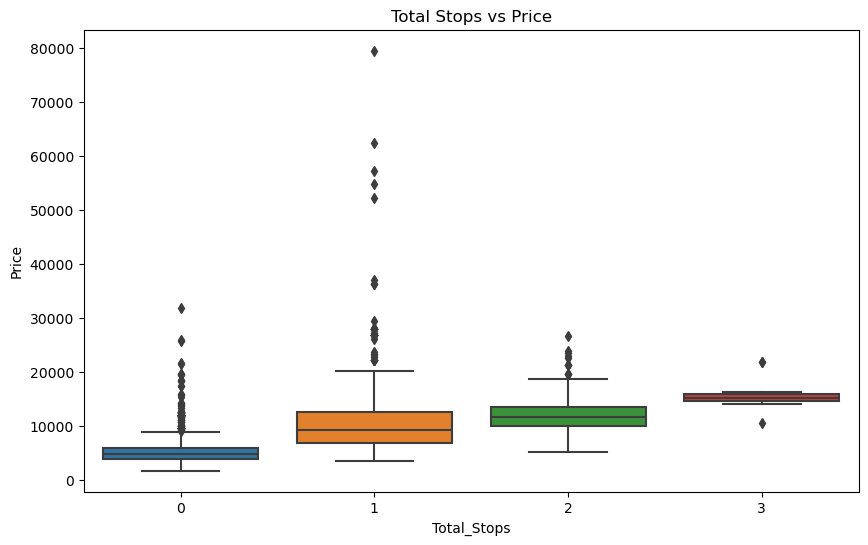

C:\Users\91843\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


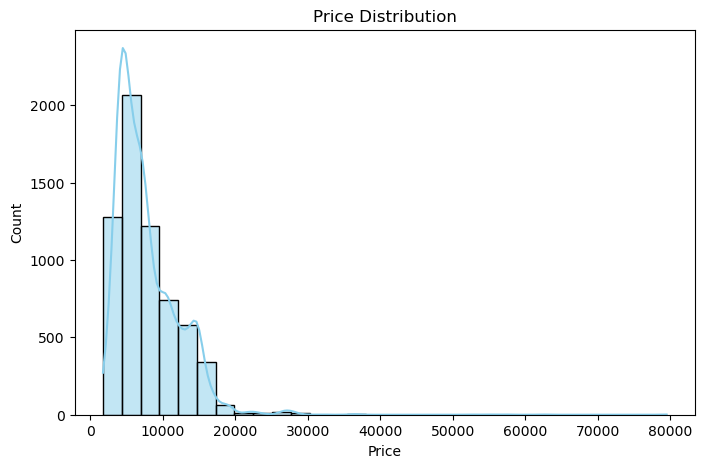

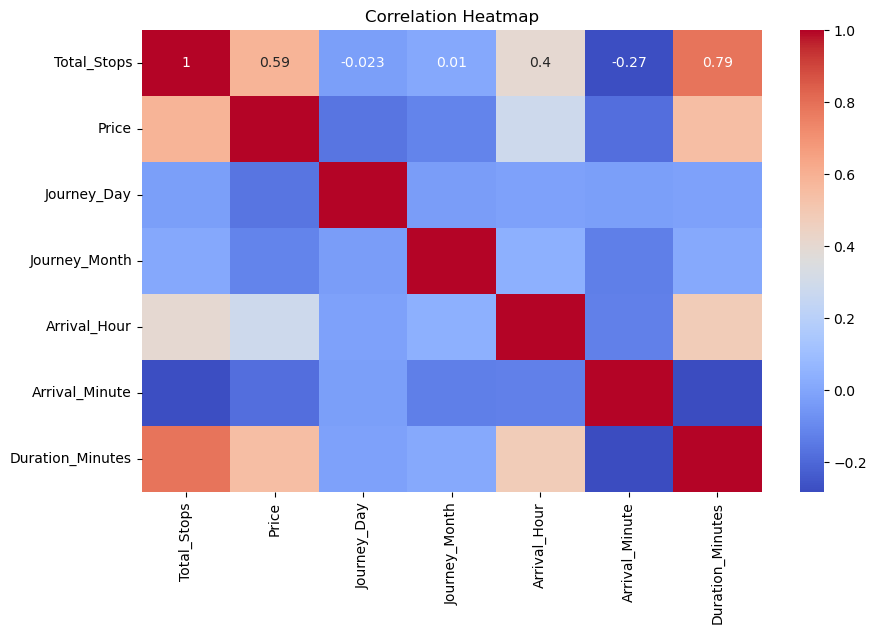

In [136]:
# Airline vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Stops', y='Price', data=data)
plt.title('Total Stops vs Price')
plt.show()

# Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Price'], bins=30, kde=True, color='skyblue')
plt.title('Price Distribution')
plt.show()

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Handle missing values by dropping rows with NaN values
numeric_data = numeric_data.dropna()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [138]:
# Define features and target
X = data.drop(['Price', 'Route', 'Additional_Info'], axis=1)
y = data['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is the dataframe with your features and target
X = data.drop('Price', axis=1)  # Features (assuming 'Price' is the target column)
y = data['Price']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure numeric columns only for scaling
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# Handle missing values (optional, if needed)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test = scaler.transform(X_test)  # Only transform the test data

# Check the results
print("Scaled X_train:", X_train.shape)
print("Scaled X_test:", X_test.shape)


Scaled X_train: (5078, 6)
Scaled X_test: (1270, 6)


In [142]:
# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R-Squared Value: {r2}")


Model Evaluation:
Mean Squared Error: 3982401.771263707
R-Squared Value: 0.7696423643543975


In [144]:
# Model Performance
print("\nRandom Forest Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared Value: {r2:.2f}")

# Note: You can extend this section to compare multiple models such as Linear Regression, Decision Tree, etc.


Random Forest Model Performance:
Mean Squared Error: 3982401.77
R-Squared Value: 0.77


In [146]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Initialize models to compare
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Machine": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
}

# DataFrame to store model results
results = []

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining and Evaluating: {model_name}")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Cross-validation score (optional for robustness)
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()
    
    # Evaluation Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results in a dictionary
    results.append({
        'Model': model_name,
        'MSE': mse,
        'R2 Score': r2,
        'CV R2 Score': cv_score
    })
    
    # Print metrics for this model
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-Squared Score: {r2:.4f}")
    print(f"Cross-Validation R2 Score: {cv_score:.4f}")

# Convert results to a DataFrame for comparison
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print("\nModel Performance Comparison:")
print(results_df)


Training and Evaluating: Linear Regression
Mean Squared Error: 9658221.96
R-Squared Score: 0.4413
Cross-Validation R2 Score: 0.3961

Training and Evaluating: Ridge Regression
Mean Squared Error: 9658185.03
R-Squared Score: 0.4413
Cross-Validation R2 Score: 0.3961

Training and Evaluating: Lasso Regression
Mean Squared Error: 9658220.35
R-Squared Score: 0.4413
Cross-Validation R2 Score: 0.3961

Training and Evaluating: Decision Tree
Mean Squared Error: 6215007.48
R-Squared Score: 0.6405
Cross-Validation R2 Score: 0.4982

Training and Evaluating: Random Forest
Mean Squared Error: 3982401.77
R-Squared Score: 0.7696
Cross-Validation R2 Score: 0.6998

Training and Evaluating: Gradient Boosting
Mean Squared Error: 5148716.27
R-Squared Score: 0.7022
Cross-Validation R2 Score: 0.6468

Training and Evaluating: Support Vector Machine
Mean Squared Error: 9024649.30
R-Squared Score: 0.4780
Cross-Validation R2 Score: 0.4325

Model Performance Comparison:
                    Model           MSE  R2

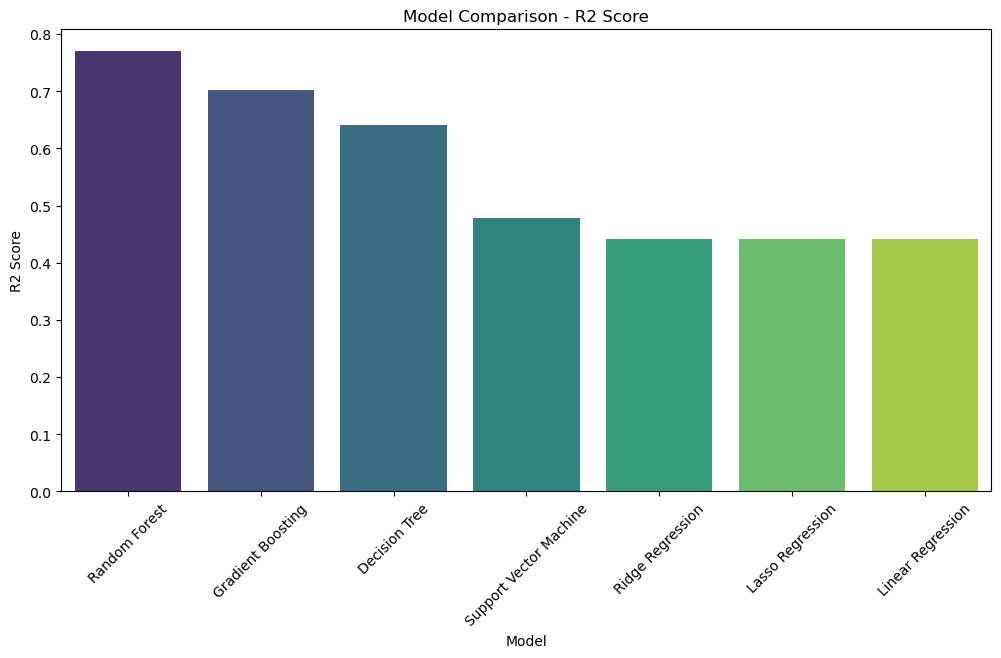

In [148]:
# Visualize Model Performance
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R2 Score', data=results_df, palette='viridis')
plt.title('Model Comparison - R2 Score')
plt.xticks(rotation=45)
plt.show()